In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 18 kB/s 
     |████████████████████████████████| 47.6 MB 30 kB/s 


In [ ]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 2.112s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# list them
!ls -l

total 3512
-rw-r--r-- 1 root root   59898 Oct 15 02:56 chinese.jpg
drwx------ 5 root root    4096 Nov 10 10:56 drive
-rw-r--r-- 1 root root   97910 Oct 15 02:56 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Oct 15 02:56 english.png
-rw-r--r-- 1 root root  487995 Oct 15 02:56 example2.png
-rw-r--r-- 1 root root  127454 Oct 15 02:56 example3.png
-rw-r--r-- 1 root root  488641 Oct 15 02:56 example.png
-rw-r--r-- 1 root root  168376 Oct 15 02:56 french.jpg
-rw-r--r-- 1 root root   42159 Oct 15 02:56 japanese.jpg
-rw-r--r-- 1 root root  225531 Oct 15 02:56 korean.png
drwxr-xr-x 1 root root    4096 Nov  1 13:35 sample_data
-rw-r--r-- 1 root root   82229 Oct 15 02:56 thai.jpg
-rw-r--r-- 1 root root   34706 Oct 15 02:56 width_ths.png


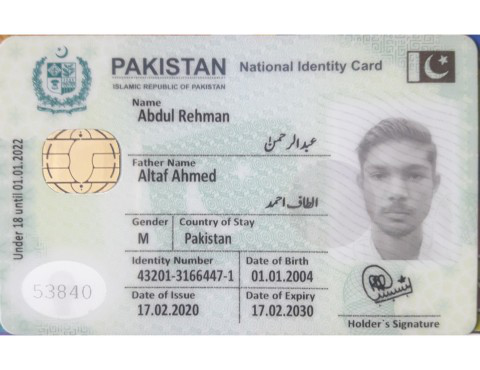

In [ ]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/content/drive/MyDrive/Colab Notebooks/shot.jpeg")
im

In [ ]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['th','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('/content/drive/MyDrive/Colab Notebooks/shot.jpeg')
bounds

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[108, 52], [232, 52], [232, 82], [108, 82]],
  'pakistan',
  0.9921133081317866),
 ([[237, 59], [385, 59], [385, 75], [237, 75]],
  ' national identity card',
  0.6583164474706851),
 ([[132, 98], [162, 98], [162, 106], [132, 106]], 'ก', 0.01796650137044531),
 ([[137, 107], [233, 107], [233, 125], [137, 125]],
  'abdul rehman',
  0.8924830061589868),
 ([[283, 133], [317, 133], [317, 153], [283, 153]], 'm4', 0.08914059211528225),
 ([[130, 158], [164, 158], [164, 166], [130, 166]],
  'รก',
  0.058981361517280395),
 ([[137, 169], [219, 169], [219, 185], [137, 185]],
  'altat anmed',
  0.7620512778969),
 ([[11, 137], [27, 137], [27, 231], [11, 231]], '.', 0.3711086343931482),
 ([[267, 195], [323, 195], [323, 211], [267, 211]],
  'สารรเ',
  0.025816951703170075),
 ([[131, 217], [171, 217], [171, 229], [131, 229]],
  'pender',
  0.15388311934556906),
 ([[179, 217], [257, 217], [257, 229], [179, 229]],
  ' countr ol stam',
  0.18308624402422216),
 ([[183, 231], [235, 231], [235, 247], [183,

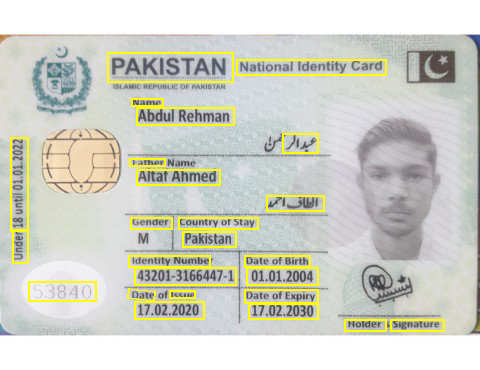

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)